**1.Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2.Mount the Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**3.Import the Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Retails Sales Project/retail_sales_dataset.csv')

In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


**The Data has been imported**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


**4.Check that is there any null values are there in this data. Is there any
null values are there just drop the values**

In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


As you can see there is no null values. It's good to go

In [ ]:
print('Total Sales: {}'.format(df['Quantity'].sum()))
print('Total Amount: {}'.format(df['Total Amount'].sum()))

Total Sales: 2514
Total Amount: 456000


In [ ]:
df.shape

(1000, 9)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


**5.Let's Start Visualizing the data**

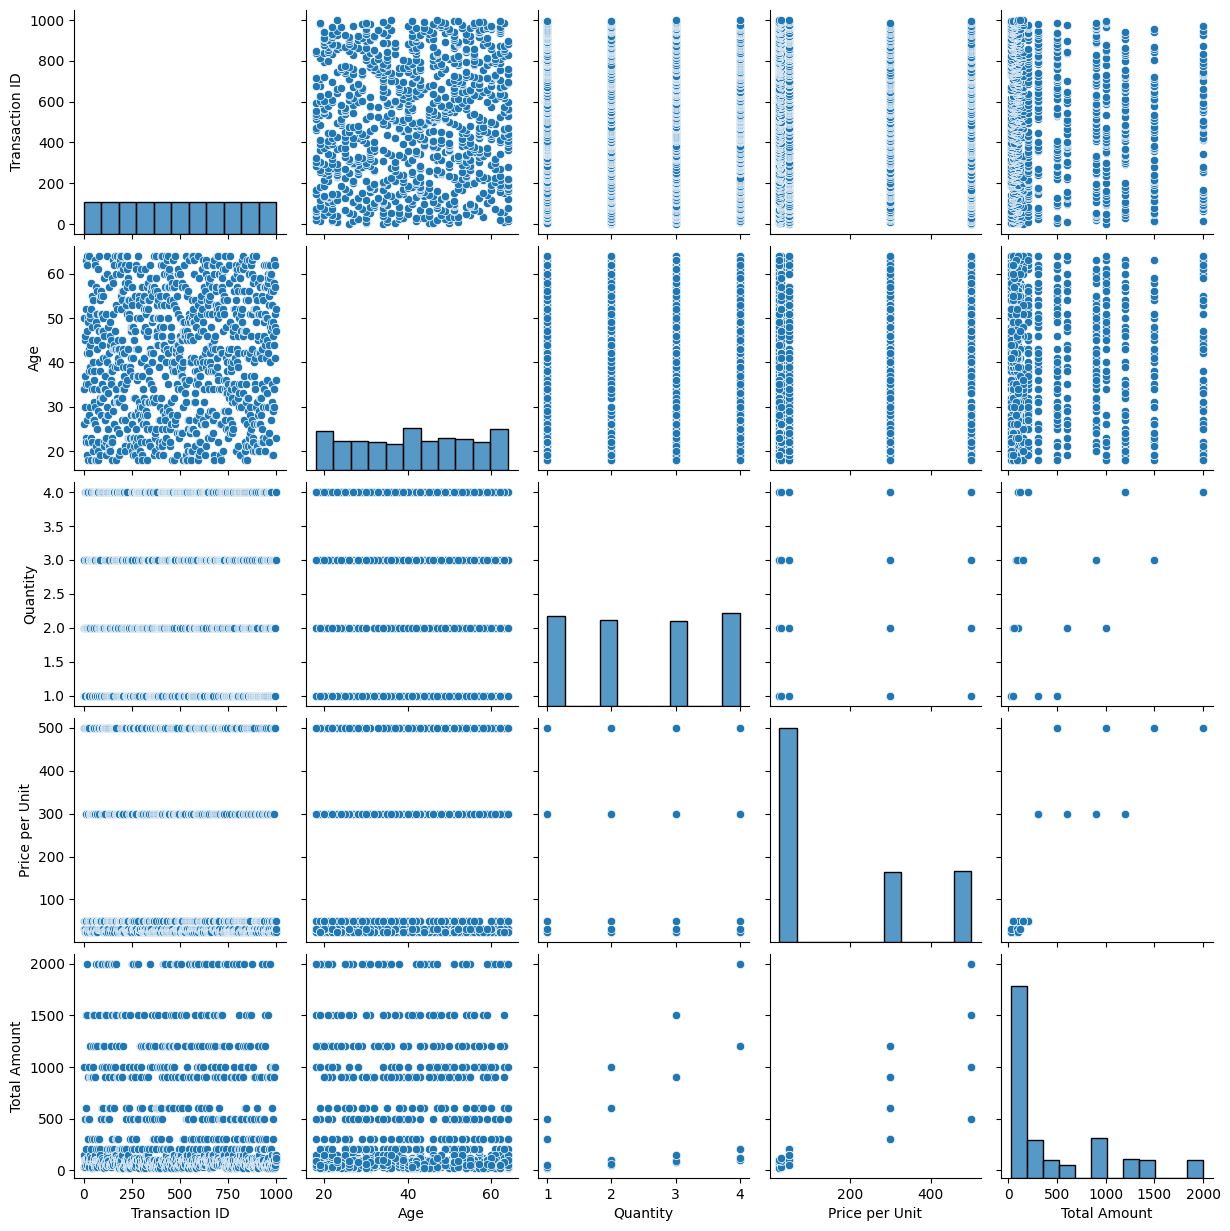

In [ ]:
sns.pairplot(df)

In [ ]:
df['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


In [ ]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

<ipython-input-21-3f8b815b4640>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Product Category'], palette=['#3390FF', '#3357FF','#FF5733'])


<Axes: xlabel='Product Category', ylabel='count'>

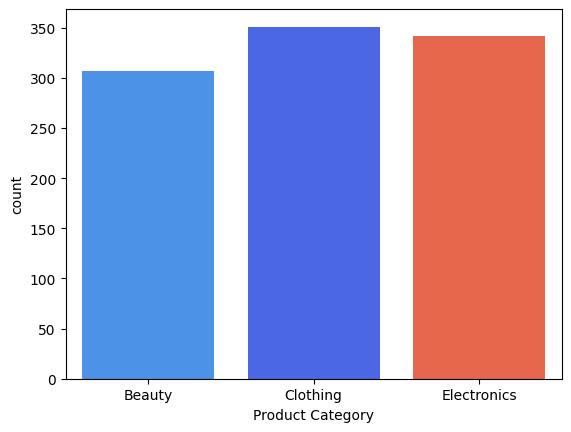

In [ ]:
#sns.countplot(df['Product Category'])
sns.countplot(x=df['Product Category'], palette=['#3390FF', '#3357FF','#FF5733'])

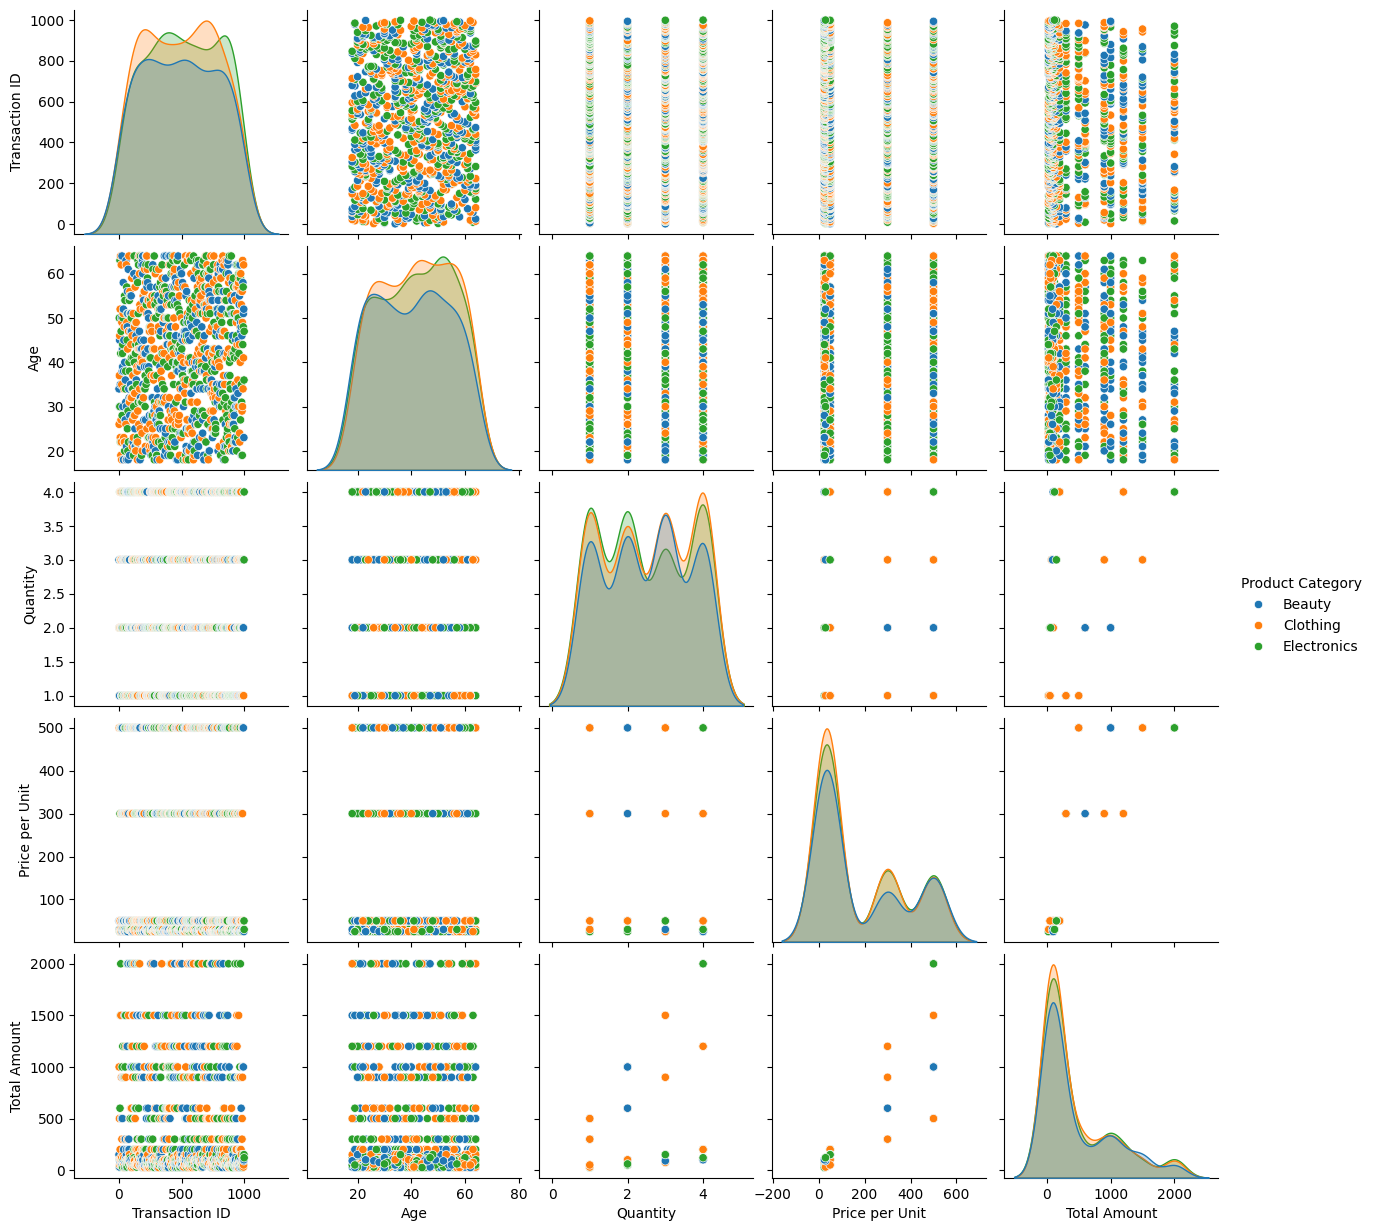

In [ ]:
sns.pairplot(df, hue='Product Category')

In [ ]:
p = df.groupby('Product Category')[['Quantity','Total Amount']].sum()
p

,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


**6.Visualizing the Bar Plot of Quantity,Total amount and Product Category**

Text(0.5, 0, 'Product Category')

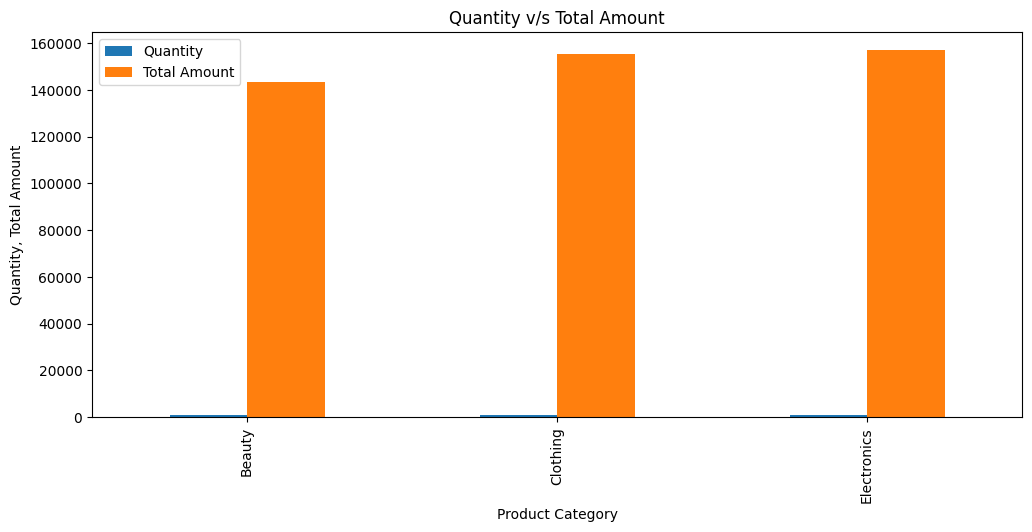

In [ ]:
p.plot(kind ='bar', figsize=(12,5))
plt.title('Quantity v/s Total Amount')
plt.ylabel('Quantity, Total Amount')
plt.xlabel('Product Category')

In [ ]:
cate=df['Product Category'].value_counts()

**7.Visualizing the Pie Chart of the Product Category**

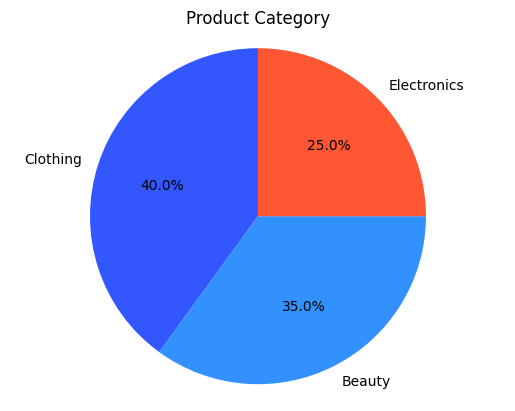

In [ ]:
import matplotlib.pyplot as plt

labels = ['Clothing', 'Beauty', 'Electronics']
sizes = [40, 35, 25]
colors = ['#3357FF','#3390FF', '#FF5733']  # Custom colors

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

plt.title("Product Category")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


In [ ]:
gen = df['Gender'].value_counts()
gen

,count
Gender,
Female,510
Male,490


**Visualizing the Pie chart for Gender**

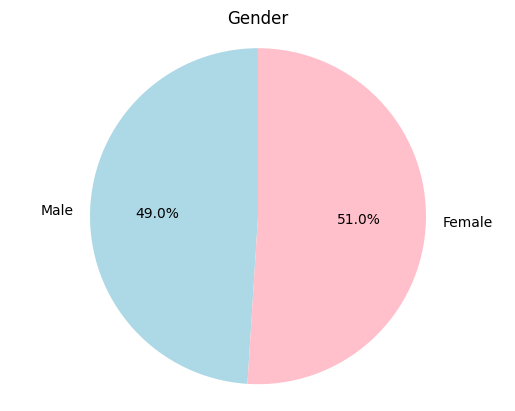

In [ ]:
labels = ['Male','Female']
sizes = [49,51]
figsize=(7,7)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90 ,colors=['LightBlue','Pink'])

plt.title("Gender")
plt.axis('equal')
plt.show()

**Visualize the Histogram of the Person's Age**

<Axes: title={'center': "Person's Age"}, xlabel='Age', ylabel='count'>

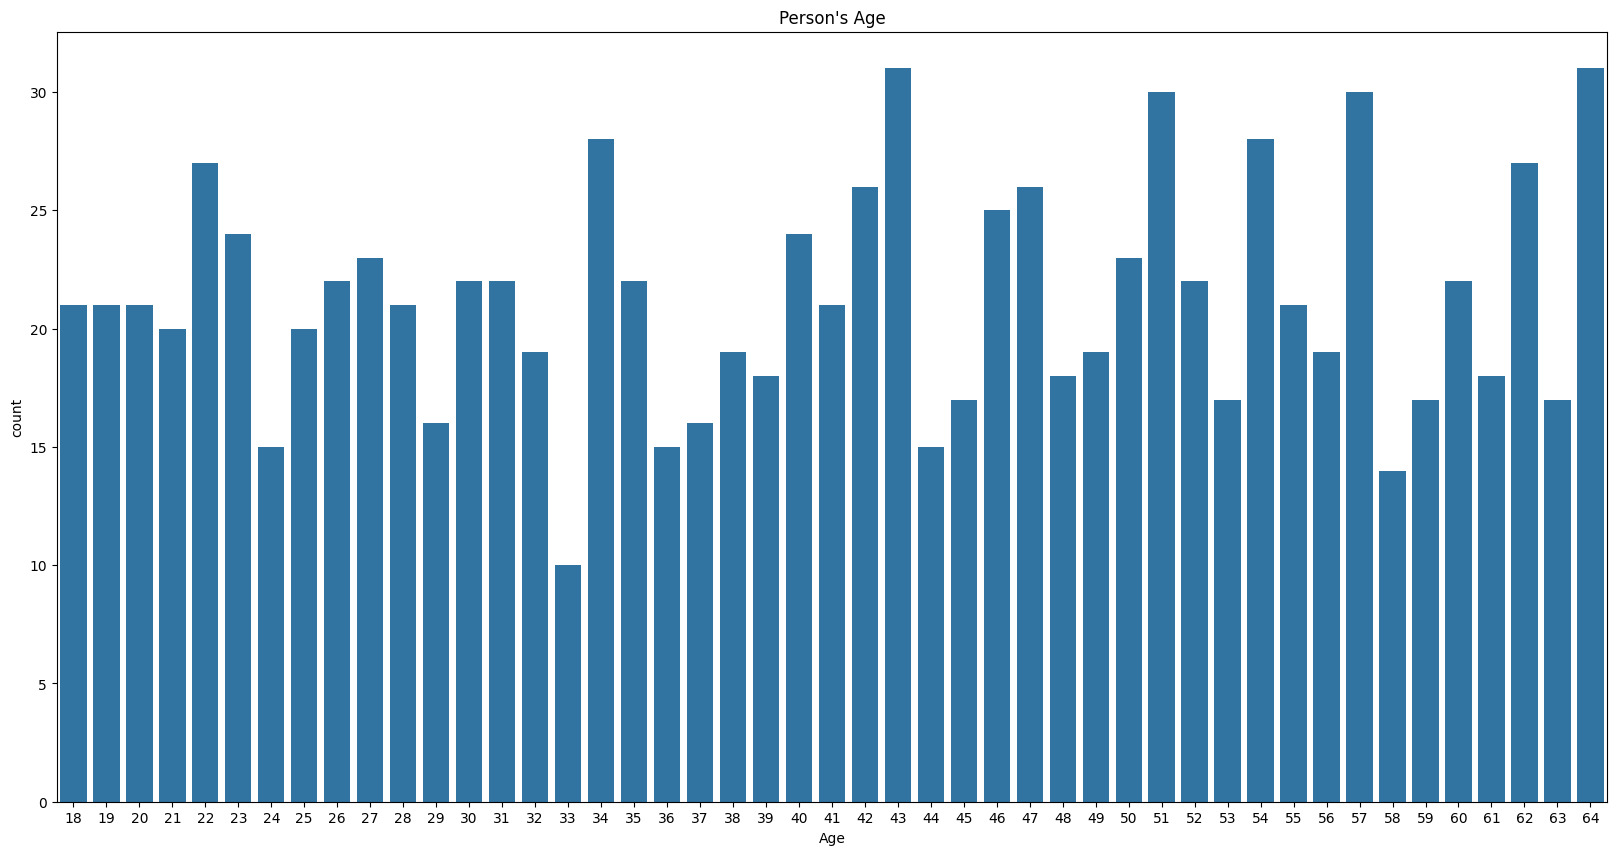

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Person's Age")
plt.xlabel("Age")
sns.countplot(x='Age',data=df)

<Axes: title={'center': "Person's Age"}, xlabel='Age', ylabel='count'>

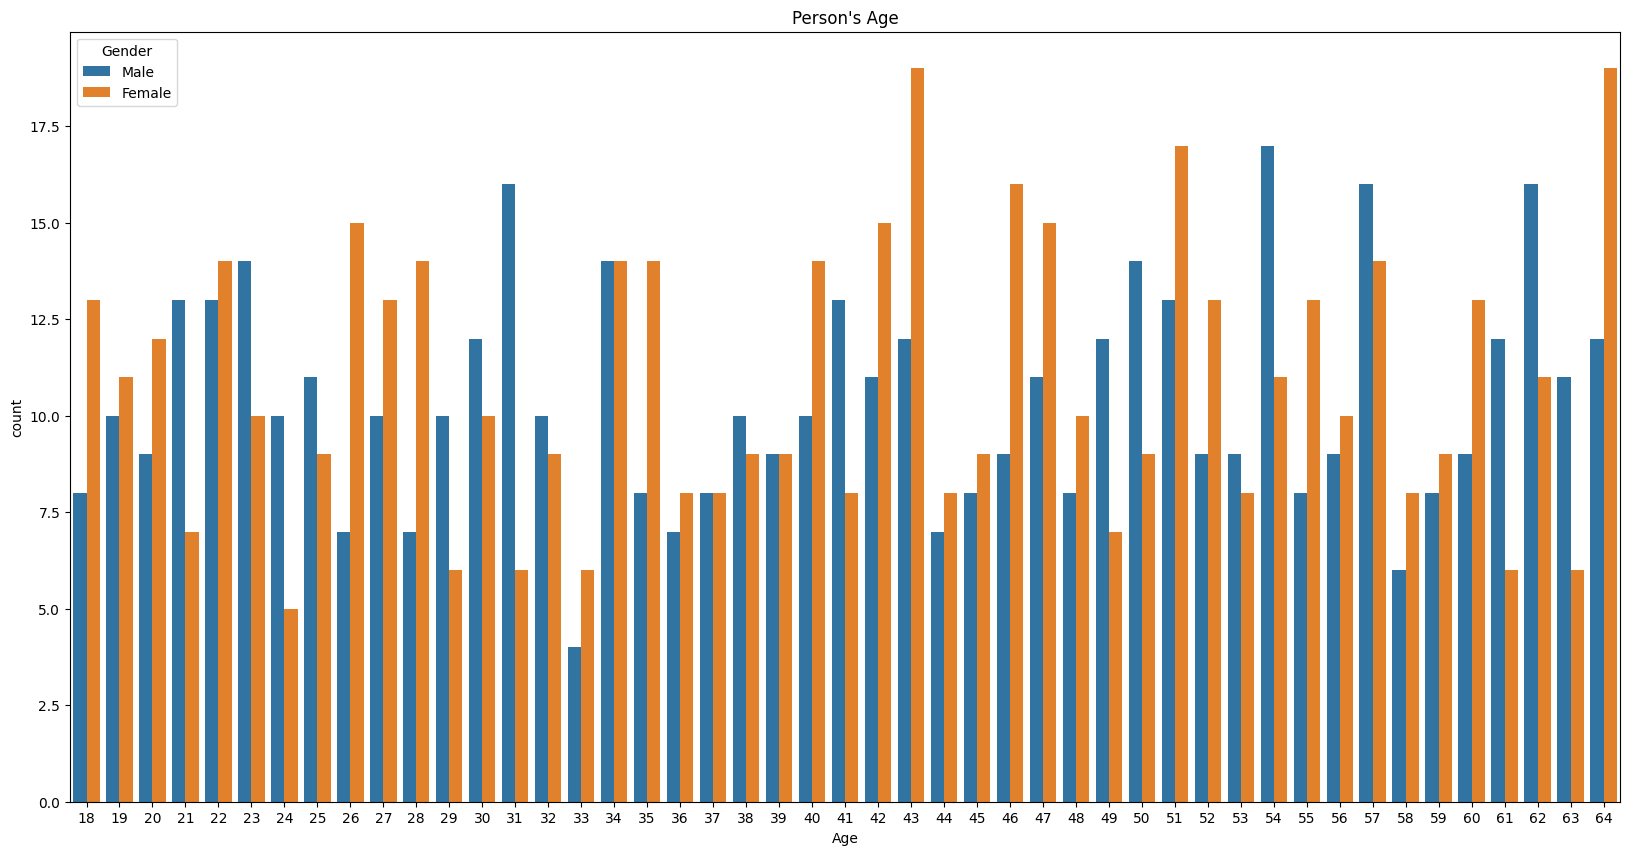

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Person's Age")
plt.xlabel("Age")
sns.countplot(x='Age',data=df,hue='Gender')

In [ ]:
df['Price per Unit'].corr(df['Total Amount'])

0.8519248403554022

**Visualize the Lineplot for Price per Unit and Total Amount**

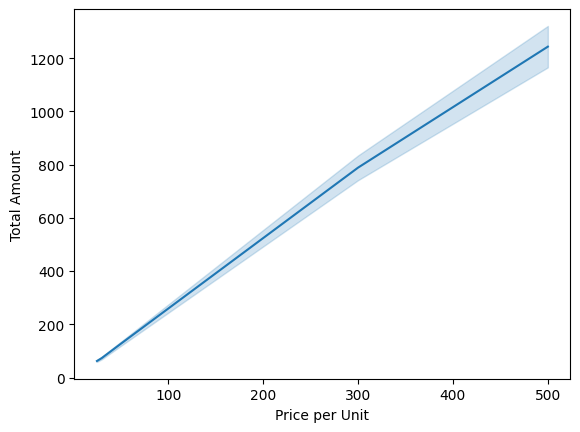

In [ ]:
sns.lineplot(x='Price per Unit',y='Total Amount',data=df)
plt.show()

**Machine Learning Model**

In [ ]:
# Data Preprocessing
# Drop irrelevant columns (Transaction ID, Date, Customer ID - if not needed for prediction)
df = df.drop(columns=['Transaction ID', 'Date', 'Customer ID'], errors='ignore')

In [ ]:
# Splitting Features and Target
X = df.drop(columns=['Total Amount'])
y = df['Total Amount']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

In [ ]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'\n{name} Model Performance:')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R2 Score: {r2}')


Random Forest Model Performance:
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Score: 1.0

Gradient Boosting Model Performance:
MAE: 1.2975467800765201
MSE: 5.017659581203238
RMSE: 2.2400132993362423
R2 Score: 0.9999828590390181

Linear Regression Model Performance:
MAE: 173.2085434679079
MSE: 41883.992042912796
RMSE: 204.65578917517286
R2 Score: 0.8569189755192663


**Suggesstions are always welcome**

# **Thank You !**